###* Google Drive mount
- Colab 노트북과 Google Drive를 연동하여, Google Drive 내의 데이터에 접근
- Google 계정 로그인 후 권한 허용하면 이용 가능.
- Colab 상에서는 좌측 탭의 폴더 클릭 후, 세 번째 아이콘인 드라이브 마운트를 클릭해도 됨

In [2]:
# google colab 모듈로부터 drive 함수 불러오기
from google.colab import drive

# Google Drive를 '/content/drive' 위치에 마운트
drive.mount('/content/drive')

Mounted at /content/drive


- 성공적으로 마운트 되었다면 "Mounted at /path/to/mount" 결과가 출력됨
- 폴더 내의 내용물을 확인하기 위하여 os module을 활용

In [3]:
# os 모듈 불러오기 및 listdir() 함수를 이용해 내용물 확인
import os
os.listdir('/content/drive')

['.shortcut-targets-by-id',
 'MyDrive',
 '.file-revisions-by-id',
 'Othercomputers',
 '.Trash-0']

- 데이터는 https://github.com/ageron/handson-ml2/tree/master/datasets/housing 에 있는 housing.csv 파일을 다운로드 함
- 다운로드 후 구글 드라이브의 /data/lecture_ml2에 업로드함

In [4]:
os.listdir('/content/drive/MyDrive/data/lecture_ml2')

['housing.csv', 'map.JPG', 'person.png']

### * Pandas를 이용한 데이터 불러오기

In [5]:
# Pandas 모듈 불러오기
import pandas as pd

# csv 파일 읽고 pandas.DataFrame으로 불러오기
housing = pd.read_csv('/content/drive/MyDrive/data/lecture_ml2/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
# DataFrame의 데이터 종류 (column) 확인
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


### * Pandas 및 matplotlib을 이용한 데이터 시각화
- 지리정보 (longitude, latitude)를 이용한 데이터 시각화
- 데이터의 column 이름을 이용해 x, y값을 지정할 수 있음
- matplotlib은 그래프를 그리는데 특화된 module로 배워두면 매우 유용함 (참고: https://matplotlib.org/stable/gallery/index.html)

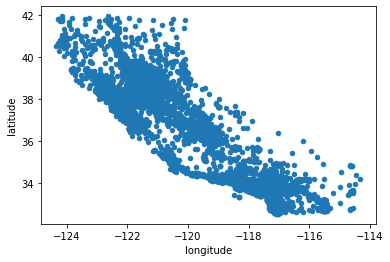

In [7]:
# DataFrame의 plot() 함수를 이용해 데이터 시각화
_ = housing.plot(kind='scatter', x='longitude', y='latitude')

- 투명도 (alpha) 옵션을 이용해 데이터가 밀집된 영역을 확인할 수 있음


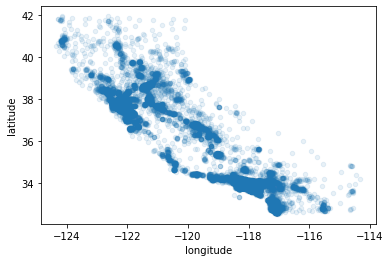

In [8]:
_ = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

- Pandas의 plot() 기능은 matplotlib 모듈을 기반으로 하고있음.
- 같은 작업을 matplotlib 모듈을 활용해 수행할 수 있음.
- 책의 저자가 matplotlib 모듈 기본 활용법을 정리해둔 노트북 링크: https://github.com/ageron/handson-ml2/blob/master/tools_matplotlib.ipynb

In [9]:
# matplotlib 및 matplotlib.pyplot 모듈 불러오기 
import matplotlib as mpl
import matplotlib.pyplot as plt

# 노트북 내에서 그래프를 즉각적으로 확인할 수 있게 해줌
%matplotlib inline

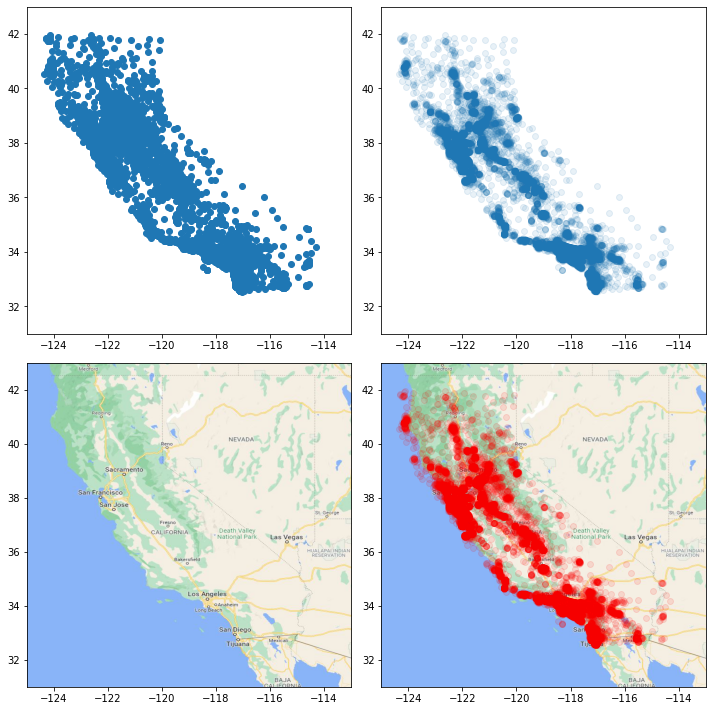

In [10]:
# Figure 및 axis object 생성
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.reshape(-1)
# 위도/경도를 이용한 그래프 그리기
axs[0].scatter(x=housing['longitude'], y=housing['latitude'])
# 투명도 적용
axs[1].scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.1)

# 배경 그림 불러오기 (미 서부지방 지도)
img = plt.imread('/content/drive/MyDrive/data/lecture_ml2/map.JPG')
# 배경 그림을 2D로 그리기
axs[2].imshow(img, extent=[-125, -113, 31, 43])
axs[3].imshow(img, extent=[-125, -113, 31, 43])
# 동일한 그래프 위에 위도/경도를 이용한 그래프 그리기
axs[3].scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.1, c='r')

# 모든 그래프 축에 대하여 x, y 범위 지정
for ax in axs:
    ax.set_xlim([-125, -113])
    ax.set_ylim([31, 43])
plt.tight_layout()

- 투명도 외에도, 원의 크기 및 색 등으로 다른 데이터를 표현하여 데이터 사이의 상관관계를 시각화 할 수 있음

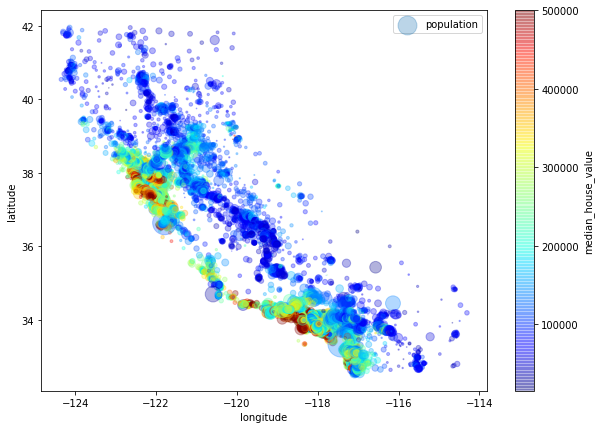

In [11]:
_ = housing.plot(
        kind='scatter', x='longitude', y='latitude', alpha=0.3, s=housing['population']/50, \
        label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), 
        colorbar=True, sharex=False
)

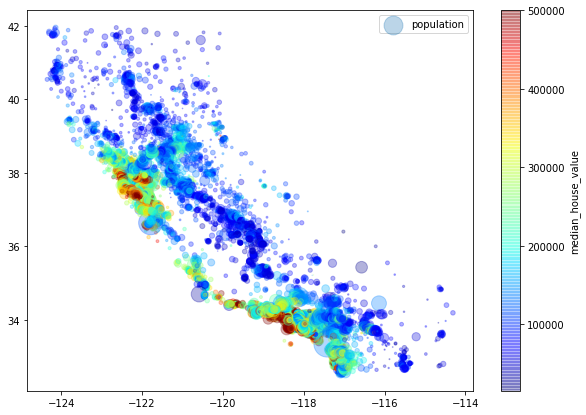

In [12]:
# matplotlib을 활용할 경우
f, ax = plt.subplots(1, 1, figsize=(10, 7))
im = ax.scatter(x=housing['longitude'], y=housing['latitude'], s=housing['population']/50, \
        label='population',  c=housing['median_house_value'], alpha=0.3, \
        cmap=plt.get_cmap('jet'))
ax.legend()
f.colorbar(im, ax=ax, label='median_house_value')

- 해안선을 따라 주택가격이 대체로 높게 형성된 것을 알 수 있으며, 인구밀도와도 큰 상관관계가 있음을 알 수 있음.
- 하지만 위도 38도 이상부터는 해안가임에도 불구하고 주택 가격이 낮게 나타나기 때문에 단순한 규칙 적용이 어려움

### * 상관관계 조사
- Pandas DataFrame의 corr() 함수를 이용해 person correlation coefficient를 계산할 수 있으며, 선형적인 상관관계를 알 수 있음
- +1에 가까울수록 양의 선형 상관관계를, -1에 가까울수록 음의 선형 상관관계를 의미함
- 0에 가까울수록 비-선형 상관관계를 가짐

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
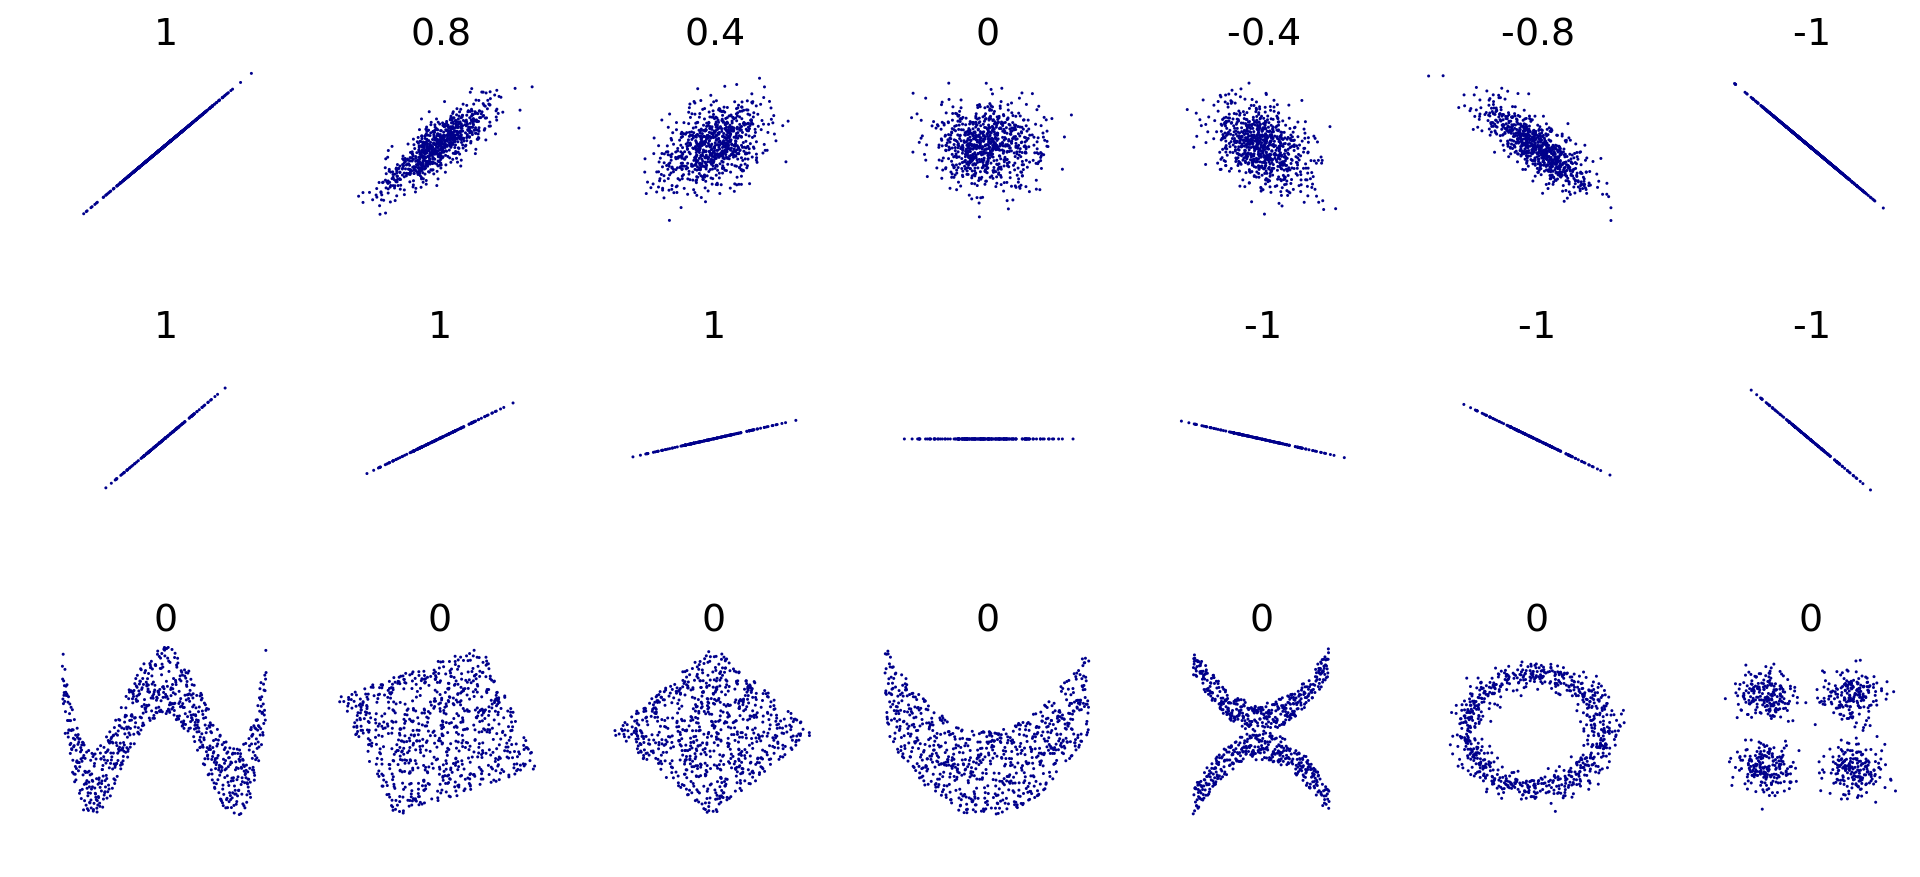


- 계산된 correlation matrix를 seaborn (matplotlib 기반 그래프 module)을 활용해 heatmap으로 표현함

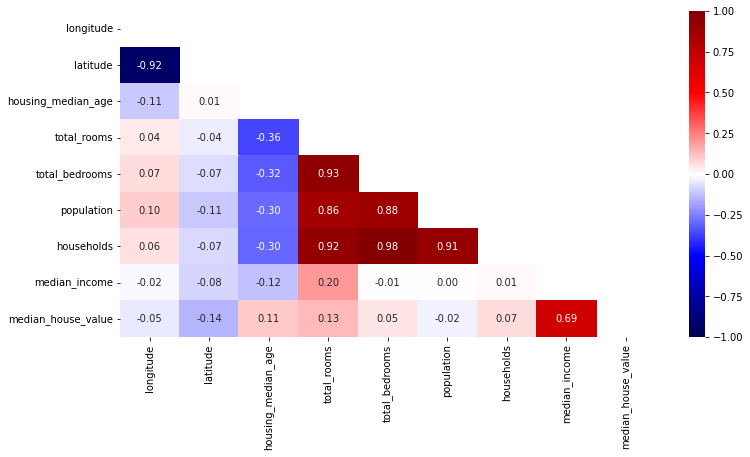

In [13]:
# seaborn 모듈 불러오기
import seaborn as sns
import numpy as np

# pandas.DataFrame.corr() 함수를 이용한 Person correlation coefficient 계산
corr = housing.corr()

# figure object 생성
f, ax = plt.subplots(figsize=(12, 6))

# seaborn.heatmap() 함수를 이용한 시각화
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, annot=True, cmap='seismic', fmt='.2f', vmin=-1, vmax=1, mask=mask)

- Correlation으로부터 중간 주택 가격 (median house value)은 다음과 같은 상관관계를 갖고 있음을 확인할 수 있음
> - 위도 (latitude)와 약한 음의 상관관계
> - 방 갯수 (total rooms)와 약한 양의 상관관계
> - 중간 소득 (median income)과 강한 양의 상관관계





* 일부 특성을 선정하고 (데이터의 종류가 많음), pandas의 plotting 기능을 활용해 데이터의 분포를 확인할 수 있음

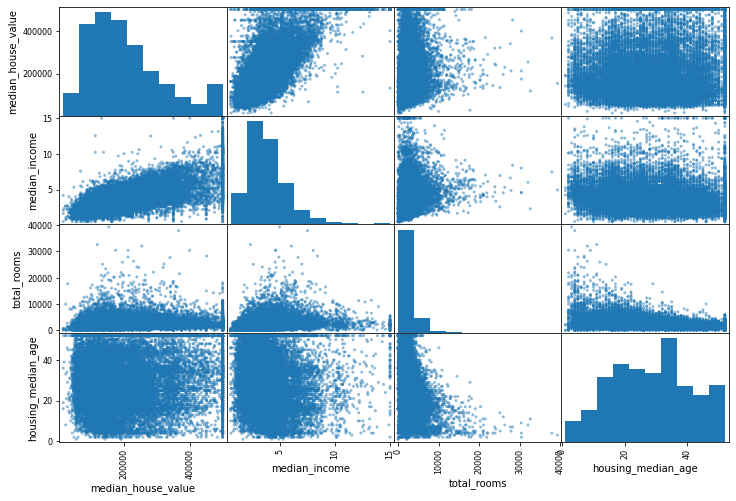

In [14]:
# 그래프를 그릴 특성을 선정 (column name)
attrs = ['median_house_value','median_income','total_rooms','housing_median_age']

# pandas.plotting.scatter_matrix() 함수를 이용해 분산 그래프를 그림
_ = pd.plotting.scatter_matrix(housing[attrs], figsize=(12,8))

* 선형관계가 나타나는 diagonal 부분은 데이터 분포를 나타내는 histogram이 표시됨

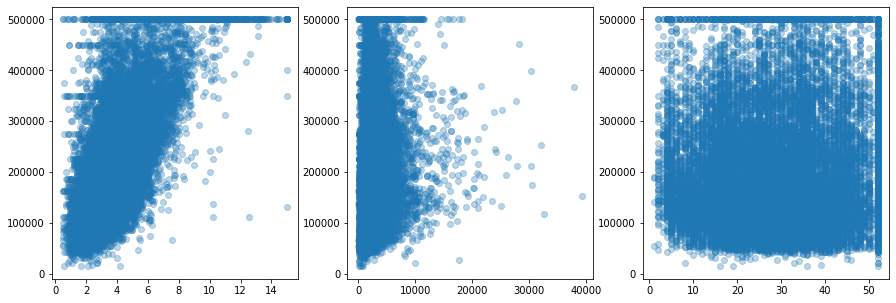

In [16]:
f, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, x in enumerate([housing['median_income'], housing['total_rooms'], housing['housing_median_age']]):
    axs[i].scatter(x, housing['median_house_value'], alpha=0.3)

- 데이터 상한값 지정으로 인한 수직/수평선 등은 알고리즘을 이상한 형태 (예: 상수함수)로 수렴시킬 수 있기 때문에 제거하는것이 좋음.

In [17]:
# 'median_house_value'가 500,000 미만인 부분만 선택
mask = housing['median_house_value'] < 500000
masked_housing = housing[mask]

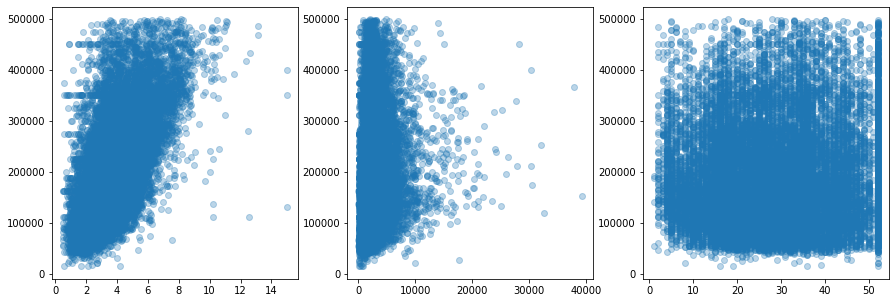

In [19]:
f, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, x in enumerate([masked_housing['median_income'], masked_housing['total_rooms'], masked_housing['housing_median_age']]):
    axs[i].scatter(x, masked_housing['median_house_value'], alpha=0.3)

- 수평선을 그리던 데이터가 제거된 것을 확인할 수 있음
- mask는 True, False로 구성된 list(), numpy.array(), 또는 pandas.Series()
```
0         True
1         True
2         True
3         True
4         True
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool
```
- 여러개의 조건을 주는것도 가능하며, DataFrame의 길이 (행)만 같으면 됨
- 각 조건은 괄호 ()로 묶고, 괄호 사이는 & (and) 또는 | (or)로 연결하면 됨

```
mask = (housing['median_house_value'] > 300000) & (housing['total_rooms'] < 20000)
```



### * 특성 조합을 이용한 새로운 데이터 생성
- 데이터들을 조합하여 보다 상관관계가 높은 새로운 데이터를 생성할 수 있음

In [21]:
# 원본 dataframe 복제
new_housing = housing.copy()
# 가구당 방 개수
new_housing['rooms_per_household'] = new_housing['total_rooms']/new_housing['households']
# 침실 비율
new_housing['bedrooms_per_rooms'] = new_housing['total_bedrooms']/new_housing['total_rooms']
# 가구당 구성원
new_housing['population_per_household'] = new_housing['population']/new_housing['households']

- 앞서 사용한 seaborn 모듈을 활용해 correlation을 heatmap으로 표현

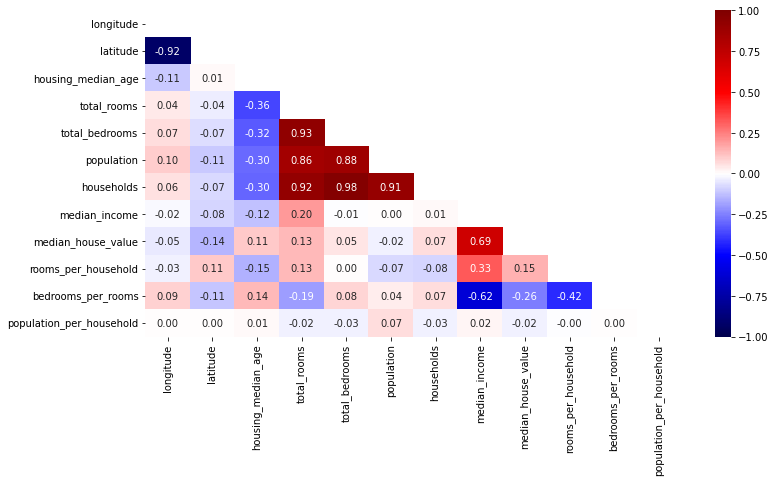

In [23]:
f, ax = plt.subplots(figsize=(12, 6))

corr = new_housing.corr()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, annot=True, cmap='seismic', fmt='.2f', vmin=-1, vmax=1, mask=mask)

- 새로운 특성 중 'rooms_per_household'는 약한 양의 상관관계를, 'bedrooms_per_rooms'는 음의 상관관계를 갖는걸 확인할 수 있음.
- 이러한 방식으로 원하는 결과값과 상관관계가 큰 특성 (feature)를 잘 선정하여 모델을 학습시켜야 함
- 모델을 만들어 테스트를 수행하고, 결과를 분석하여 다시 데이터를 탐색하는 과정을 반복해야 함